## Building a CNN using Keras 

### Dataset Fashion MNIST

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

## Data Preperation

In [6]:
x = pd.read_csv("./Dataset/fashion-mnist.csv")

In [8]:
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print(X.shape,y.shape)

(10000, 784) (10000,)


In [9]:
np.unique(y,return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [11]:
X_Train = X.reshape((-1,28,28,1))
Y_Train = np_utils.to_categorical(y)

print(X_Train.shape,Y_Train.shape)

(10000, 28, 28, 1) (10000, 10)


In [17]:
print(Y_Train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


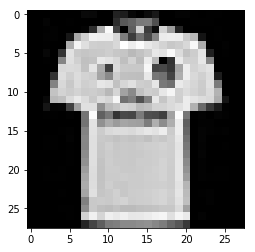

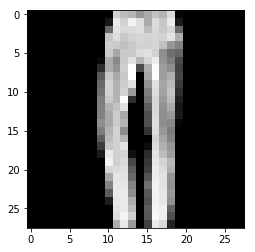

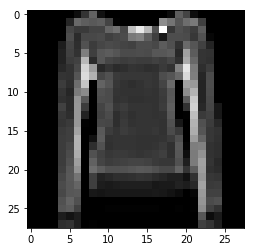

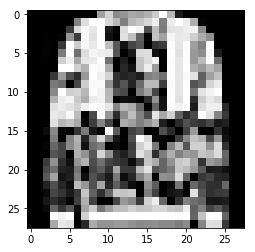

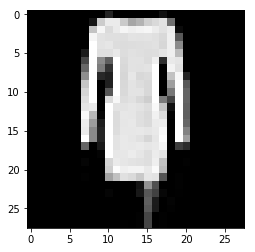

In [22]:
for i in range(5):
    plt.figure(i)
    plt.imshow(X_Train[i].reshape((28,28)),cmap='gray')
    plt.show()

# CNN Model 

In [23]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25)) # Randomly drops 25% of Neurons from previous layer
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()
          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [26]:
hist = model.fit(X_Train,Y_Train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 80s 10ms/step - loss: 1.4909 - acc: 0.4537 - val_loss: 0.8658 - val_acc: 0.6795
Epoch 2/20
8000/8000 [==============================] - 66s 8ms/step - loss: 0.7452 - acc: 0.7133 - val_loss: 0.7105 - val_acc: 0.7315
Epoch 3/20
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6527 - acc: 0.7469 - val_loss: 0.6628 - val_acc: 0.7600
Epoch 4/20
8000/8000 [==============================] - 63s 8ms/step - loss: 0.5861 - acc: 0.7747 - val_loss: 0.5735 - val_acc: 0.7960
Epoch 5/20
8000/8000 [==============================] - 60s 8ms/step - loss: 0.5443 - acc: 0.7935 - val_loss: 0.5512 - val_acc: 0.8045
Epoch 6/20
8000/8000 [==============================] - 60s 8ms/step - loss: 0.5068 - acc: 0.8065 - val_loss: 0.5070 - val_acc: 0.8220
Epoch 7/20
8000/8000 [==============================] - 60s 8ms/step - loss: 0.4679 - acc: 0.8299 - val_loss: 0.4879 - val_acc: 0.8395
Epoch

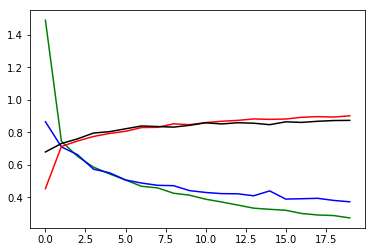

In [27]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()